In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt 

In [2]:
x = [2,3,4,10,11,12,20,25,30]
y = [1,2,3,4,5,6,7,8,9]

In [3]:
columns = ['x','y']
dt = np.array([x,y])
df = pd.DataFrame(dt.T,columns = columns)
print(df)

    x  y
0   2  1
1   3  2
2   4  3
3  10  4
4  11  5
5  12  6
6  20  7
7  25  8
8  30  9


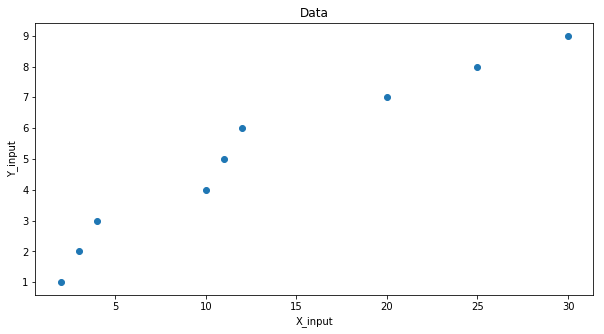

In [4]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.set_title('Data')
ax.scatter(x=df['x'],y=df['y'],label='Our Data')
ax.set_xlabel('X_input')
ax.set_ylabel('Y_input')
plt.show()


In [5]:
def euclidean_distance(num1,num2):
    return ((num1[0]-num2[0])**2+(num1[1]-num2[1])**2)**0.5

In [6]:
def find_distance_for_random_input(class1,class2,test):
    distance = []
    for i in range(len(df[class1])):
        #print([int(df.T[test][class1]),int(df.T[test][class2])])
        distance.append(int(euclidean_distance([int(df.T[test][class1]),int(df.T[test][class2])],[int(df.T[i][class1]),int(df.T[i][class2])])))
    
    return distance

In [7]:
def find_distance_for_calculated_mean(class1,class2,test):
    distance = []
    for i in range(len(df[class1])):
        #print([int(df.T[test][class1]),int(df.T[test][class2])])
        distance.append(int(euclidean_distance(test,[int(df.T[i][class1]),int(df.T[i][class2])])))
    
    return distance

In [8]:
def find_k_number_of_mean(k):
    cc = [[] for i in range(len(k))]
    for j in range(len(k[0])):
        for i in range(len(k)):
            if i == 0:
                a = k[i][j] 
                b = i
            else:
                if(a>k[i][j]):
                    b = i
                    a = k[i][j]      
        cc[b].append(j)
    #print(cc)
    x = []
    for i in cc:
        x.append(calculate_mean(i,'x','y'))
    
    return x

In [9]:
def find_k_number_of_group(k):
    cc = [[] for i in range(len(k))]
    for j in range(len(k[0])):
        for i in range(len(k)):
            if i == 0:
                a = k[i][j] 
                b = i
            else:
                if(a>k[i][j]):
                    b = i
                    a = k[i][j]      
        cc[b].append(j)
    
    
    return cc

In [10]:
def calculate_mean(listt,class1,class2): 
    l1 = 0.0
    l2 = 0.0
    if listt:
        for i in range(len(df[class1])):
            if i in listt:
                l1 += (df[class1][i])
        l1 = l1/float(len(listt))
    
    
        for i in range(len(df[class2])):
            if i in listt:
                l2 += (df[class2][i])
        l2 = l2/float(len(listt))
        return l1,l2
    return [],[]

In [11]:
def knn_classifier(k,class1,class2): # class1 = 1st attribute class, class2 = 2nd attribute class, k = k value
    container = []
    
    # selecting randomly center point
    for i in range(k):   
        test = random.randint(0,len(df[class1])-1)
        print(test)
        container.append(find_distance_for_random_input(class1,class2,test))  
    random_k_center = find_k_number_of_mean(container) 
    #selecting center point by calculation mean value
    previous_k_center_point = random_k_center
    #print(previous_k_center_point)
    checker = True
    count = 0
    while(checker):
        count += 1
        container = []
        for i in previous_k_center_point: 
            container.append(find_distance_for_calculated_mean(class1,class2,i)) 
        new_k_center_point = find_k_number_of_mean(container) 
        #print(previous_k_center_point)
        if(previous_k_center_point == new_k_center_point):
            return new_k_center_point, find_k_number_of_group(container)
        previous_k_center_point = new_k_center_point
        if count == 50:
            checker = False
    return previous_k_center_point, find_k_number_of_group(container)

In [116]:
k_center_point,k_number_of_group = knn_classifier(3,'x','y')
k_number_of_group

4
6
0


[[3, 4, 5], [6, 7, 8], [0, 1, 2]]

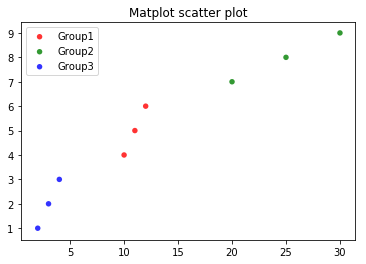

In [118]:


x = []
y = []
for i in k_number_of_group:
    a = []
    b = []
    for j in i:
        a.append(df.T[j]['x'])
        b.append(df.T[j]['y'])
    x.append(a)
    y.append(b)

    
data = ((np.array(x[0]),np.array(y[0])), (np.array(x[1]),np.array(y[1])), (np.array(x[2]),np.array(y[2])))
colors = ("red", "green", "blue")
groups = ("Group1", "Group2", "Group3") 
 
# Create plot
fig = plt.figure()
ax = fig.add_subplot(111)
#ax = fig.add_subplot(1, 1, 1, axisbg="1.0")
 
for data, color, group in zip(data, colors, groups):
    x, y = data
    ax.scatter(x, y, alpha=0.8, c=color, edgecolors='none', s=30, label=group)
 
plt.title('Matplot scatter plot')
plt.legend(loc=2)
plt.show()